In [ ]:
%%capture
!pip install metaphone
!pip install difflib

In [ ]:
import numpy as np
import networkx as nx
from tqdm.notebook import tqdm
from collections import OrderedDict
import pickle
import time
import pandas as pd

In [ ]:
from metaphone import doublemetaphone
import difflib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

project_path = "/content/drive/MyDrive/Colab Notebooks/Projects/PIE/"

Mounted at /content/drive


In [ ]:
def load_embeddings(language_code):
    with open(project_path + "Embeddings/" + str(language_code) + "_embeddings.pickle", 'rb') as f:
        return pickle.load(f)

In [ ]:
de_embeddings = load_embeddings('de')
en_embeddings = load_embeddings('en')
fr_embeddings = load_embeddings('fr')
hi_embeddings = load_embeddings('hi')
la_embeddings = load_embeddings('la')
ma_embeddings = load_embeddings('ma')
pa_embeddings = load_embeddings('pa')
sp_embeddings = load_embeddings('sp')

In [ ]:
'''
with open(project_path + "Embeddings/de_embeddings.pickle", 'rb') as f:
    de_embeddings = pickle.load(f)
with open(project_path + "Embeddings/en_embeddings.pickle", 'rb') as f:
    en_embeddings = pickle.load(f)
with open(project_path + "Embeddings/fr_embeddings.pickle", 'rb') as f:
    fr_embeddings = pickle.load(f)
with open(project_path + "Embeddings/hi_embeddings.pickle", 'rb') as f:
    hi_embeddings = pickle.load(f)
with open(project_path + "Embeddings/la_embeddings.pickle", 'rb') as f:
    la_embeddings = pickle.load(f)
with open(project_path + "Embeddings/ma_embeddings.pickle", 'rb') as f:
    ma_embeddings = pickle.load(f)
with open(project_path + "Embeddings/pa_embeddings.pickle", 'rb') as f:
    pa_embeddings = pickle.load(f)
with open(project_path + "Embeddings/sp_embeddings.pickle", 'rb') as f:
    sp_embeddings = pickle.load(f)
'''

'\nwith open(project_path + "Embeddings/de_embeddings.pickle", \'rb\') as f:\n    de_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/en_embeddings.pickle", \'rb\') as f:\n    en_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/fr_embeddings.pickle", \'rb\') as f:\n    fr_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/hi_embeddings.pickle", \'rb\') as f:\n    hi_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/la_embeddings.pickle", \'rb\') as f:\n    la_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/ma_embeddings.pickle", \'rb\') as f:\n    ma_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/pa_embeddings.pickle", \'rb\') as f:\n    pa_embeddings = pickle.load(f)\nwith open(project_path + "Embeddings/sp_embeddings.pickle", \'rb\') as f:\n    sp_embeddings = pickle.load(f)\n'

In [ ]:
with open(project_path + "Embeddings/vectors_list.pickle", 'rb') as f:
    vectors_list = pickle.load(f)

In [ ]:
len(en_embeddings.keys())

31644

In [ ]:
def invert_embeddings(emb):
    a = {}
    for k, v in emb.items():
        a.update({v : k})
    return a

In [ ]:
def phone_sim_graph(emb1, emb2):
    graph = {}
    graph2 = {}
    for k in tqdm(vectors_list):
        w1 = emb1[k]
        w2 = emb2[k]
        if doublemetaphone(w1) == doublemetaphone(w2) and len(w1) > 3:# or
        #if difflib.SequenceMatcher(None, w1, w2).ratio() > 0.98:
            graph.update({w1 : k})
            #print(doublemetaphone(w1))
    return graph

In [ ]:
def save_graph(graph, lang1, lang2):
    with open(project_path + "Graphs/" + str(lang1) + "_" + str(lang2) + "_graph.pickle", 'wb') as f:
        pickle.dump(graph, f)

In [ ]:
hi_de_graph = phone_sim_graph(hi_embeddings, de_embeddings)
#hi_en_graph = phone_sim_graph(hi_embeddings, en_embeddings)
hi_fr_graph = phone_sim_graph(hi_embeddings, fr_embeddings)
hi_la_graph = phone_sim_graph(hi_embeddings, la_embeddings)
hi_sp_graph = phone_sim_graph(hi_embeddings, sp_embeddings)

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

In [ ]:
save_graph(hi_de_graph, 'hi', 'de')
#save_graph(hi_en_graph, 'hi', 'en)
save_graph(hi_fr_graph, 'hi', 'fr')
save_graph(hi_la_graph, 'hi', 'la')
save_graph(hi_sp_graph, 'hi', 'sp')

In [ ]:
ma_de_graph = phone_sim_graph(ma_embeddings, de_embeddings)
#ma_en_graph = phone_sim_graph(ma_embeddings, en_embeddings)
ma_fr_graph = phone_sim_graph(ma_embeddings, fr_embeddings)
ma_la_graph = phone_sim_graph(ma_embeddings, la_embeddings)
ma_sp_graph = phone_sim_graph(ma_embeddings, sp_embeddings)

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

In [ ]:
save_graph(ma_de_graph, 'ma', 'de')
#save_graph(ma_en_graph, 'ma', 'en')
save_graph(ma_fr_graph, 'ma', 'fr')
save_graph(ma_la_graph, 'ma', 'la')
save_graph(ma_sp_graph, 'ma', 'sp')

In [ ]:
pa_de_graph = phone_sim_graph(pa_embeddings, de_embeddings)
#pa_en_graph = phone_sim_graph(pa_embeddings, en_embeddings)
pa_fr_graph = phone_sim_graph(pa_embeddings, fr_embeddings)
pa_la_graph = phone_sim_graph(pa_embeddings, la_embeddings)
pa_sp_graph = phone_sim_graph(pa_embeddings, sp_embeddings)

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

  0%|          | 0/31644 [00:00<?, ?it/s]

In [ ]:
save_graph(pa_de_graph, 'pa', 'de')
#save_graph(pa_en_graph, 'pa', 'en')
save_graph(pa_fr_graph, 'pa', 'fr')
save_graph(pa_la_graph, 'pa', 'la')
save_graph(pa_sp_graph, 'pa', 'sp')

In [ ]:
'''
ta_de_graph = phone_sim_graph(ta_embeddings, de_embeddings)
#ta_en_graph = phone_sim_graph(ta_embeddings, en_embeddings)
ta_fr_graph = phone_sim_graph(ta_embeddings, fr_embeddings)
ta_la_graph = phone_sim_graph(ta_embeddings, la_embeddings)
ta_sp_graph = phone_sim_graph(ta_embeddings, sp_embeddings)
'''

'\nta_de_graph = phone_sim_graph(ta_embeddings, de_embeddings)\n#ta_en_graph = phone_sim_graph(ta_embeddings, en_embeddings)\nta_fr_graph = phone_sim_graph(ta_embeddings, fr_embeddings)\nta_la_graph = phone_sim_graph(ta_embeddings, la_embeddings)\nta_sp_graph = phone_sim_graph(ta_embeddings, sp_embeddings)\n'

In [ ]:
'''
save_graph(ta_de_graph)
#save_graph(ta_en_graph)
save_graph(ta_fr_graph)
save_graph(ta_la_graph)
save_graph(ta_sp_graph)
'''

'\nsave_graph(ta_de_graph)\n#save_graph(ta_en_graph)\nsave_graph(ta_fr_graph)\nsave_graph(ta_la_graph)\nsave_graph(ta_sp_graph)\n'

In [ ]:
!pip install chart_studio

import chart_studio.plotly as py
import plotly.graph_objs as go

     |████████████████████████████████| 64 kB 2.1 MB/s 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly_express as px
import plotly.graph_objs as go
#import plotly.plotly as py
from sklearn.decomposition import PCA

In [ ]:
def make_df(graph):
    df = pd.DataFrame(list(graph.items()))

    df.rename(columns = {0:'word', 1:'vector'}, inplace = True)
    df[[i for i in range(0, 50)]] = pd.DataFrame(df['vector'].tolist(), index=df.index)
    df.drop('vector', axis=1, inplace=True)
    
    dfskills = df.drop('word', axis=1)

    return dfskills

In [ ]:
def plot_clusters(dfskills):
    pca = PCA().fit(dfskills)

    pcaratio = pca.explained_variance_ratio_
    trace = go.Scatter(x=np.arange(len(pcaratio)),y=np.cumsum(pcaratio))
    data = [trace]
    layout = dict(title="Results")
    fig = dict(data=data, layout=layout)

    pca = PCA(n_components=5)
    skillsPCA = pca.fit_transform(dfskills)


    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=6)
    skillsPCA_labels = kmeans.fit_predict(skillsPCA)

    dfskillsPCA = pd.DataFrame(skillsPCA)
    dfskillsPCA['cluster'] = skillsPCA_labels   


    from sklearn.manifold import TSNE
    X = dfskillsPCA.iloc[:,:-1]
    Xtsne = TSNE(n_components=2).fit_transform(X)
    dftsne = pd.DataFrame(Xtsne)
    dftsne['cluster'] = skillsPCA_labels
    dftsne.columns = ['x1','x2','cluster'] 


    fig = plt.plot(figsize=(10, 6))
    sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5)#,ax=ax[0])
    #fig.title('Hindi-German')
    #sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
    #ax[1].set_title('Visualized on PCA 2D')
    #fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
    display(fig)
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

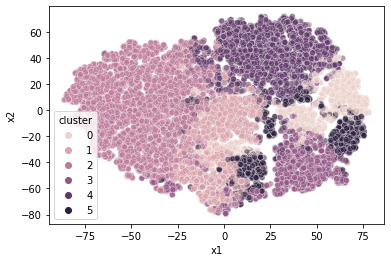

In [ ]:
plot_clusters(make_df(hi_de_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

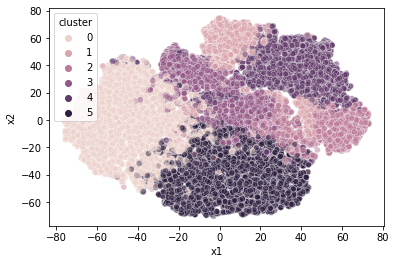

In [ ]:
plot_clusters(make_df(hi_fr_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

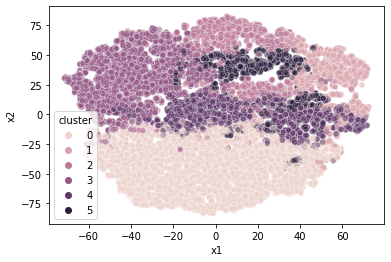

In [ ]:
plot_clusters(make_df(hi_la_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

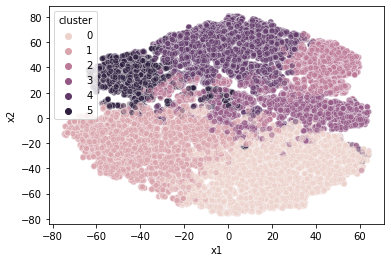

In [ ]:
plot_clusters(make_df(hi_sp_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

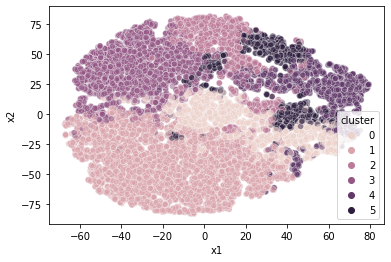

In [ ]:
plot_clusters(make_df(ma_de_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

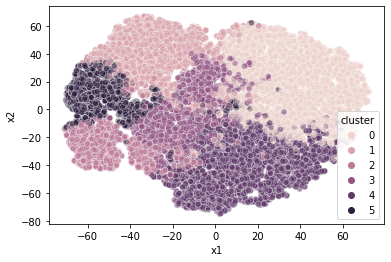

In [ ]:
plot_clusters(make_df(ma_fr_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

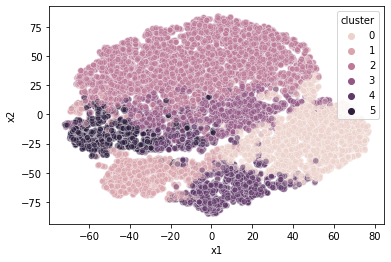

In [ ]:
plot_clusters(make_df(ma_la_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

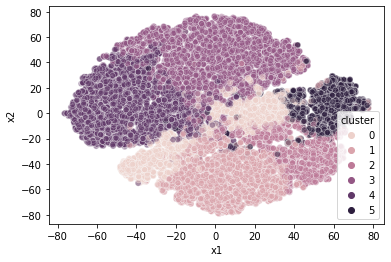

In [ ]:
plot_clusters(make_df(ma_sp_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

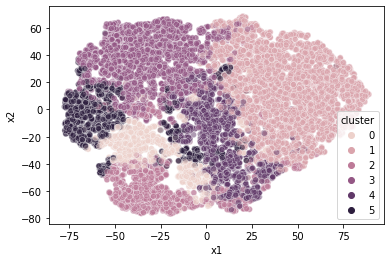

In [ ]:
plot_clusters(make_df(pa_de_graph))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[]

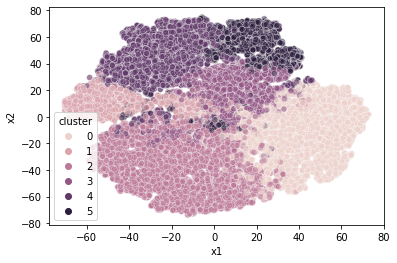

In [ ]:
plot_clusters(make_df(pa_fr_graph))

In [ ]:
plot_clusters(make_df(pa_la_graph))

In [ ]:
plot_clusters(make_df(pa_sp_graph))